In [1]:
!pip install statsmodels scikit-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np

In [4]:
home_df = pd.read_csv('../Source/Metro_Home_Values.csv')
home_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,123951.733006,124163.176264,124425.524492,124988.958362,125637.500450,...,355986.448327,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,3.635033e+05,3.641659e+05,3.643848e+05
1,394913,1,"New York, NY",msa,NY,219657.598399,220586.011622,221519.660004,223407.993412,225353.501267,...,656116.650291,658992.330717,662322.088290,665541.460972,669925.455906,675684.524493,682290.159549,6.873056e+05,6.905686e+05,6.932481e+05
2,753899,2,"Los Angeles, CA",msa,CA,236649.976987,237553.116159,238728.814647,241071.926563,243614.826354,...,978656.081035,988006.132016,993962.586203,994044.629696,990763.189872,989599.749912,993777.833894,1.000601e+06,1.005222e+06,1.010107e+06
3,394463,3,"Chicago, IL",msa,IL,159899.676257,160054.921113,160340.806271,161051.946252,161901.787792,...,328270.794339,329219.545752,329991.513159,330838.545303,332482.161364,335195.288195,338356.149580,3.407269e+05,3.421063e+05,3.429366e+05
4,394514,4,"Dallas, TX",msa,TX,129057.198121,129114.277857,129184.712729,129363.326656,129593.351700,...,380533.777024,380382.508383,380056.886976,380085.827764,380580.411239,381762.207346,382759.281581,3.829150e+05,3.822440e+05,3.812958e+05


In [5]:
rental_df = pd.read_csv('../Source/Metro_Rentals.csv')
rental_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,1310.862067,1317.635432,1326.592064,1337.166174,1347.094223,...,2213.347989,2213.517002,2214.817776,2222.706032,2233.819378,2249.433872,2262.554936,2275.422072,2285.166408,2294.365189
1,394913,1,"New York, NY",msa,NY,2227.886183,2251.118894,2267.851695,2284.702372,2288.073225,...,3443.856725,3424.581955,3442.399810,3485.052220,3519.700761,3562.290444,3572.887480,3602.208908,3614.929134,3640.093145
2,753899,2,"Los Angeles, CA",msa,CA,2621.942240,2633.999717,2654.095188,2664.578607,2690.731090,...,4292.282261,4288.887028,4298.547999,4324.901797,4338.474621,4359.776105,4378.386198,4403.227148,4421.621816,4438.079122
3,394463,3,"Chicago, IL",msa,IL,1583.391402,1588.623986,1598.554829,1611.847686,1625.919714,...,2340.672442,2340.558121,2348.018327,2358.976467,2372.088107,2383.105108,2410.442615,2433.382921,2449.264443,2459.756492
4,394514,4,"Dallas, TX",msa,TX,1409.839384,1418.548124,1429.044332,1443.495065,1457.098272,...,2340.480691,2344.493677,2343.881654,2353.395281,2357.393728,2376.919987,2390.547515,2397.750797,2402.623029,2407.581733


In [6]:
temp_index_df = pd.read_csv('../Source/Metro_market_temp_index.csv')
temp_index_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,49.0,50.0,52.0,54.0,54.0,...,55.0,53.0,55.0,59.0,62.0,62.0,61.0,58.0,56.0,54.0
1,394913,1,"New York, NY",msa,NY,50.0,51.0,55.0,57.0,55.0,...,67.0,65.0,74.0,84.0,91.0,88.0,85.0,79.0,76.0,74.0
2,753899,2,"Los Angeles, CA",msa,CA,69.0,66.0,66.0,67.0,66.0,...,72.0,72.0,77.0,81.0,84.0,82.0,80.0,74.0,69.0,67.0
3,394463,3,"Chicago, IL",msa,IL,48.0,49.0,51.0,52.0,51.0,...,60.0,58.0,62.0,68.0,74.0,77.0,75.0,71.0,67.0,64.0
4,394514,4,"Dallas, TX",msa,TX,56.0,56.0,58.0,60.0,60.0,...,56.0,57.0,61.0,65.0,66.0,66.0,63.0,59.0,55.0,52.0


In [9]:
unemployment_rate_df = pd.read_csv('../Source/UnemploymentRate.csv')
unemployment_rate_df.head()

,DATE,UNRATE
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5


In [10]:
mortage_rate_df = pd.read_csv('../Source/MORTGAGE30US.csv')
mortage_rate_df.head()

,DATE,MORTGAGE30US
0,4/2/1971,7.33
1,4/9/1971,7.31
2,4/16/1971,7.31
3,4/23/1971,7.31
4,4/30/1971,7.29


In [11]:
med_hhi_df = pd.read_csv('../Source/MedianHHI.csv')
med_hhi_df.head()

,DATE,MEHOINUSA672N
0,1/1/1984,58930
1,1/1/1985,60050
2,1/1/1986,62280
3,1/1/1987,63060
4,1/1/1988,63530


In [13]:
# Extract year from columns and identify columns for  2018, 2019, 2020, 2021, and 2022
def extract_year_from_column(col_name):
    try:
        return col_name.split('-')[0]  # Extract year from 'YYYY-MM-DD'
    except IndexError:
        return None

In [12]:
# Define the columns to keep:
# First five columns
columns_to_keep = home_df.columns[:5]

In [14]:
# Create a set of years to keep
years_to_keep = {'2018', '2019', '2020', '2021', '2022'}

In [15]:
# Filter columns to keep only those starting with the specified years
columns_for_years = [col for col in home_df.columns if extract_year_from_column(col) in years_to_keep]

In [16]:
# Combine the columns to keep
all_columns_to_keep = list(columns_to_keep) + columns_for_years

In [17]:
# Filter DataFrame
home_df_filtered = home_df[all_columns_to_keep]
home_df_filtered

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,102001,0,United States,country,NaN,224936.796550,226157.453423,227565.539106,228842.102569,230082.570244,...,332629.950264,339020.793617,344703.243672,349430.700834,351906.799070,352272.772884,350965.103895,349689.284248,348607.881444,347625.532668
1,394913,1,"New York, NY",msa,NY,463017.101885,464158.423743,465701.288710,467504.840445,470101.391909,...,610178.591413,617285.770917,624597.079863,631422.139260,635903.307082,637158.845303,635105.837835,632819.055749,631064.534234,630187.513866
2,753899,2,"Los Angeles, CA",msa,CA,638731.698987,647011.238731,654593.420165,660197.450254,664766.997359,...,929269.604158,945664.677506,958438.584519,965505.838276,967446.116961,963907.246222,957523.439461,951515.596293,947207.399802,943756.340594
3,394463,3,"Chicago, IL",msa,IL,236282.561846,237720.864245,239312.987501,240526.639118,241506.784950,...,305824.990782,310947.100611,314607.212012,317120.968172,317827.554928,317188.064539,315303.239716,313780.152712,312882.553608,312477.242332
4,394514,4,"Dallas, TX",msa,TX,240619.136380,242460.468024,244316.719062,245975.013110,247536.574326,...,361615.483923,371151.091319,379780.350552,387171.337190,391212.571612,391855.624958,390091.899048,387966.735341,386005.006674,383983.014489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,118402.297700,117954.829677,118335.865325,119235.800872,120046.621614,...,145454.961640,144112.231681,144207.105649,145969.486005,147654.949852,147731.021529,145732.144639,143459.882216,140090.098976,136256.657830
891,394743,936,"Ketchikan, AK",msa,AK,328997.433053,331176.961258,334557.354451,337993.700213,340586.812203,...,424880.605044,427683.152403,432380.124763,438555.680642,443236.690933,445815.804556,445913.344006,446063.451396,445220.415577,443586.108195
892,753874,937,"Craig, CO",msa,CO,171582.432328,172295.547470,173195.430489,173452.919113,173230.472484,...,251495.912757,255057.674024,257847.213522,260974.631866,263269.691184,265147.087552,266329.377785,267913.388431,269449.684215,271197.640362
893,395188,938,"Vernon, TX",msa,TX,73459.367625,73769.922979,74531.425581,75265.290896,75846.784779,...,100726.626245,101946.287031,103014.916880,104046.278462,104847.801929,104937.718418,104976.419367,104578.205570,103436.541426,100623.880860


In [18]:
# Select columns for date rang (2018-2022)
date_columns = [col for col in home_df_filtered.columns if '2018' in col or 
                '2019' in col or '2020' in col or '2021' in col or '2022' in col]

In [19]:
# calculate avg housing price for each month
average_housing_prices = home_df_filtered[date_columns].mean()

In [20]:
# Convert to a DataFrame
average_housing_prices_df = average_housing_prices.reset_index()
average_housing_prices_df.columns = ['Date', 'Average_Price']

In [21]:
# Convert the 'Date' column to datetime 
average_housing_prices_df['Date'] = pd.to_datetime(average_housing_prices_df['Date'], format='%Y-%m-%d')

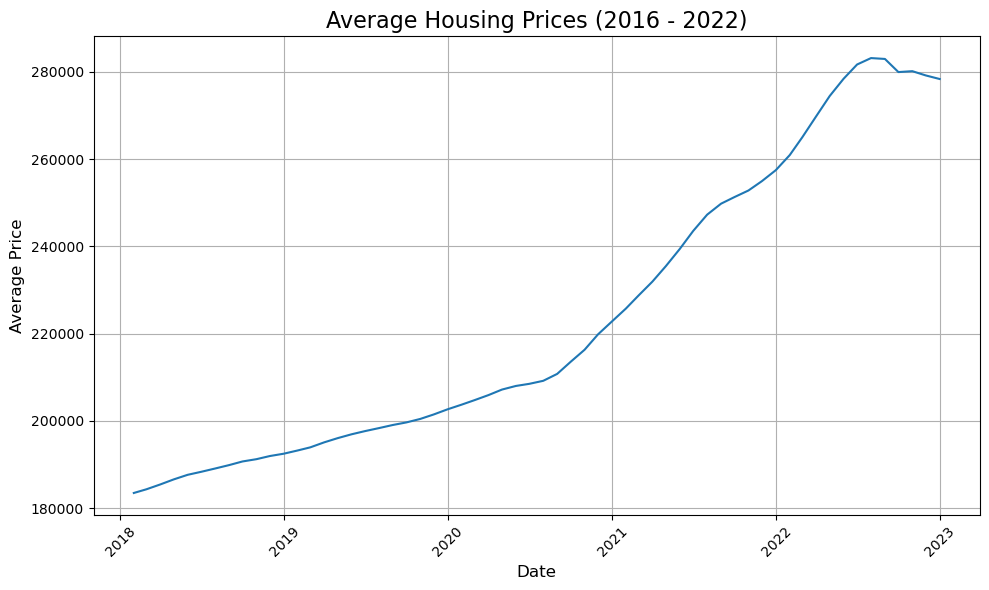

In [23]:
# Plot average housing prices over time
plt.figure(figsize=(10, 6))
plt.plot(average_housing_prices_df['Date'], average_housing_prices_df['Average_Price'])

# Add labels and title
plt.title('Average Housing Prices (2016 - 2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Select the columns for rental prices from 2016 to 2024
rental_date_columns = [col for col in rental_df.columns if '2018' in col or 
                       '2019' in col or '2020' in col or '2021' in col or '2022' in col]

In [25]:
# Calculate the average rental price for each month 
average_rental_prices = rental_df[rental_date_columns].mean()

# Convert to a DataFrame 
average_rental_prices_df = average_rental_prices.reset_index()
average_rental_prices_df.columns = ['Date', 'Average_Price']

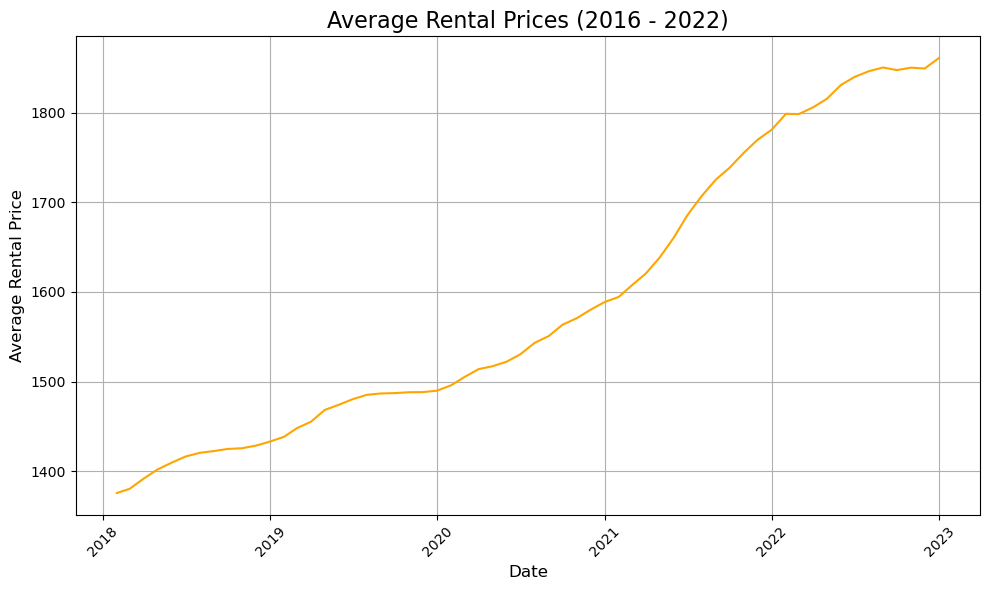

In [26]:
# Convert the 'Date' column to datetime format for better plotting
average_rental_prices_df['Date'] = pd.to_datetime(average_rental_prices_df['Date'], format='%Y-%m-%d')

# Plot the average rental prices over time
plt.figure(figsize=(10, 6))

# Plot with smaller markers for better visibility
plt.plot(average_rental_prices_df['Date'], average_rental_prices_df['Average_Price'], color='orange')

# Add labels and title
plt.title('Average Rental Prices (2016 - 2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Rental Price', fontsize=12)
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

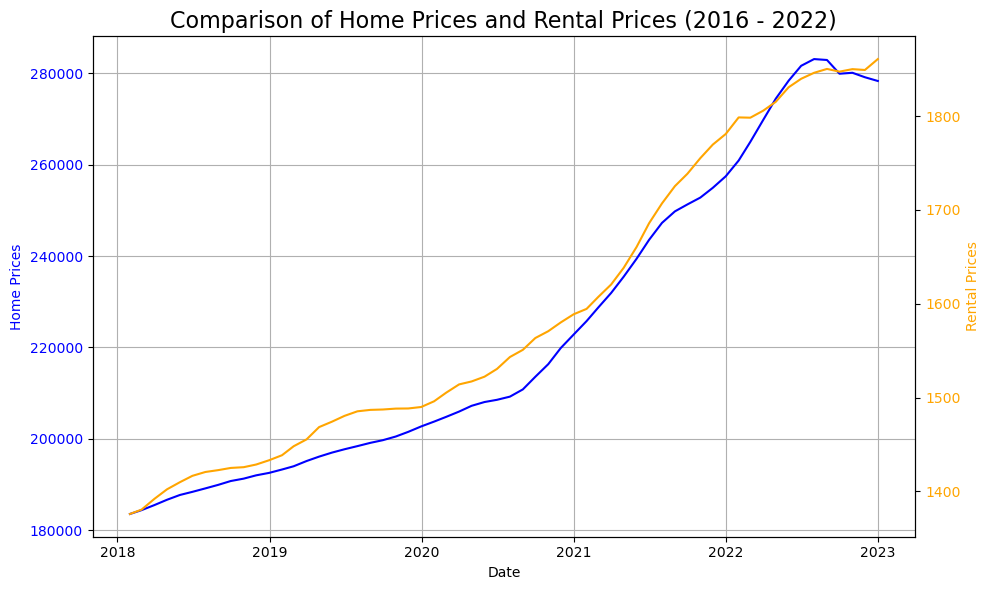

In [27]:
# Step 1: Convert 'Date' to datetime format if not already done
average_housing_prices_df['Date'] = pd.to_datetime(average_housing_prices_df['Date'], format='%Y-%m-%d')
average_rental_prices_df['Date'] = pd.to_datetime(average_rental_prices_df['Date'], format='%Y-%m-%d')

# Step 2: Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot home prices on the primary y-axis (left)
color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Home Prices', color=color)
ax1.plot(average_housing_prices_df['Date'], average_housing_prices_df['Average_Price'], 
        color=color, label='Home Prices')
ax1.tick_params(axis='y', labelcolor=color)

# Step 3: Create a secondary y-axis for the rental prices (right)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'orange'
ax2.set_ylabel('Rental Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(average_rental_prices_df['Date'], average_rental_prices_df['Average_Price'], 
         color=color, label='Rental Prices')
ax2.tick_params(axis='y', labelcolor=color)

# Step 4: Add title and grid
plt.title('Comparison of Home Prices and Rental Prices (2016 - 2022)', fontsize=16)
ax1.grid(True)

# Step 5: Display the plot
fig.tight_layout()  # adjust subplots to fit into figure area.
plt.xticks(rotation=45)
plt.show()

In [33]:
# Create Unemployment data frame
# Convert the 'DATE' column to datetime
unemployment_rate_df['DATE'] = pd.to_datetime(unemployment_rate_df['DATE'])

# Filter for the years 2018 to 2022
unemployment_filtered = unemployment_rate_df[unemployment_rate_df['DATE'].dt.year.isin([2018, 2019, 2020, 2021, 2022])]

# Rename the column to 'Mortage Rate'
unemployment_filtered = unemployment_filtered.rename(columns={'UNRATE': 'Unemployment Rate'})

# Display the filtered data
unemployment_filtered.head()

,DATE,Unemployment Rate
840,2018-01-01,4.0
841,2018-02-01,4.1
842,2018-03-01,4.0
843,2018-04-01,4.0
844,2018-05-01,3.8


In [32]:
# Create Mortage Rate data frame
# Convert the 'DATE' column to datetime
mortage_rate_df['DATE'] = pd.to_datetime(mortage_rate_df['DATE'])

# Filter for the years 2018 to 2022
mortgage_filtered = mortage_rate_df[mortage_rate_df['DATE'].dt.year.isin([2018, 2019, 2020, 2021, 2022])]

# Rename the column to 'Mortage Rate'
mortgage_filtered = mortgage_filtered.rename(columns={'MORTGAGE30US': '30 YR Mortage Rate'})

# Display the filtered data
mortgage_filtered.head()

,DATE,30 YR Mortage Rate
2440,2018-01-04,3.95
2441,2018-01-11,3.99
2442,2018-01-18,4.04
2443,2018-01-25,4.15
2444,2018-02-01,4.22


In [31]:
# Create  Median Household Income Data
# Convert the 'DATE' column to datetime
med_hhi_df['DATE'] = pd.to_datetime(med_hhi_df['DATE'])

# Filter for the years 2018 to 2022
median_income_filtered = med_hhi_df[med_hhi_df['DATE'].dt.year.isin([2018, 2019, 2020, 2021, 2022])]

# Rename the column to 'Median HHI'
median_income_filtered = median_income_filtered.rename(columns={'MEHOINUSA672N': 'Median HHI'})

# Display the filtered data
median_income_filtered.head()

,DATE,Median HHI
34,2018-01-01,75790
35,2019-01-01,81210
36,2020-01-01,79560
37,2021-01-01,79260
38,2022-01-01,77540


In [37]:
# Make date column into same format for all DF
median_income_filtered['DATE'] = pd.to_datetime(median_income_filtered['DATE'])
mortgage_filtered['DATE'] = pd.to_datetime(mortgage_filtered['DATE'])
unemployment_filtered['DATE'] = pd.to_datetime(unemployment_filtered['DATE'])

# Merge all datasets on date
merged_date_df = pd.merge(median_income_filtered, mortgage_filtered, on='DATE')
merged_date_df = pd.merge(merged_date_df, unemployment_filtered, on='DATE')

# Display
merged_date_df.head()

,DATE,Median HHI,30 YR Mortage Rate,Unemployment Rate


In [40]:
# Convert 'DATE' column in both DataFrames to datetime if not already done
average_housing_prices_df['DATE'] = pd.to_datetime(average_housing_prices_df['DATE'], format='%Y-%m-%d')
merged_data_df['DATE'] = pd.to_datetime(merged_data_df['DATE'], format='%Y-%m-%d')

KeyError: 'DATE'

In [84]:
# Create a numerical representation of the date for regression analysis
average_housing_prices_df['Date_Num'] = (average_housing_prices_df['Date'] - average_housing_prices_df['Date'].min()).dt.days
average_rental_prices_df['Date_Num'] = (average_rental_prices_df['Date'] - average_rental_prices_df['Date'].min()).dt.days

In [85]:
# Define independent and dependent variables (Home Prices over time)
X = average_housing_prices_df['Date_Num']
y = average_housing_prices_df['Average_Price']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Average_Price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1742.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.64e-65
Time:                        18:07:03   Log-Likelihood:                -1096.5
No. Observations:                 103   AIC:                             2197.
Df Residuals:                     101   BIC:                             2202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.508e+05   2008.275     75.070      0.0

Slope (Coefficient): 46.675634515466655
Intercept: 150760.53265631478


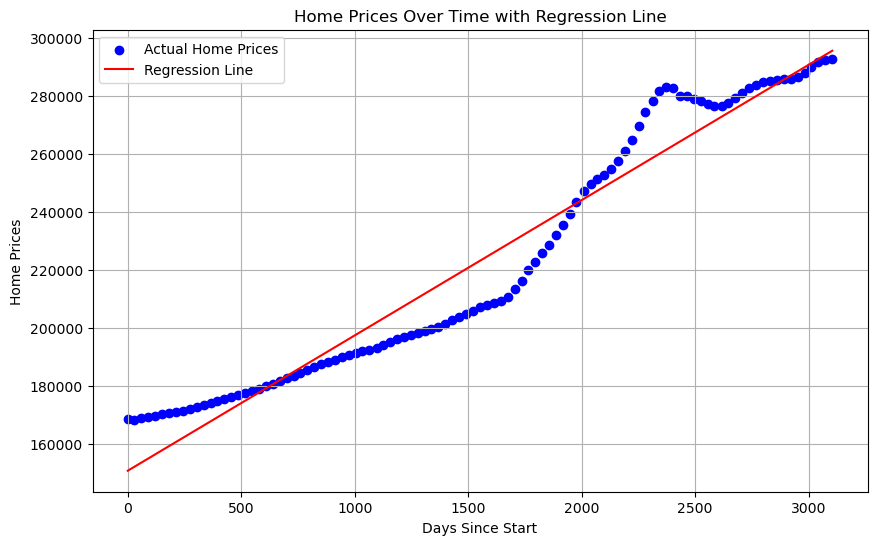

In [86]:
# Reshape the independent variable for sklearn (needs 2D array)
X = average_housing_prices_df['Date_Num'].values.reshape(-1, 1)
y = average_housing_prices_df['Average_Price'].values

# Fit the model
model = LinearRegression().fit(X, y)

# Get the coefficients and intercept
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

# Predict the values based on the model
y_pred = model.predict(X)

# Optionally, plot the original data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_housing_prices_df['Date_Num'], y, color='blue', label='Actual Home Prices')
plt.plot(average_housing_prices_df['Date_Num'], y_pred, color='red', label='Regression Line')
plt.title('Home Prices Over Time with Regression Line')
plt.xlabel('Days Since Start')
plt.ylabel('Home Prices')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
# Merge the two dataframes on Date
merged_df = pd.merge(average_housing_prices_df[['Date_Num', 'Average_Price']], 
                     average_rental_prices_df[['Date_Num', 'Average_Price']], 
                     on='Date_Num', suffixes=('_home', '_rental'))

# Define independent and dependent variables
X = merged_df[['Date_Num', 'Average_Price_rental']]
y = merged_df['Average_Price_home']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Average_Price_home   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.221e+04
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          3.31e-120
Time:                        18:08:40   Log-Likelihood:                -962.74
No. Observations:                 103   AIC:                             1931.
Df Residuals:                     100   BIC:                             1939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.226e+05 